## **誘導体のSMILESの作成**

In [1]:
!pip install rdkit
import rdkit
from rdkit import rdBase, Chem, DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import AllChem, Draw
from copy import deepcopy
import numpy as np
import pandas as pd
from numpy import vectorize as vec
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
print(rdBase.rdkitVersion)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 40.6 MB/s eta 0:00:00
2023.09.1


In [3]:
# 母骨格(C12=CC=CC=C1N=CC=C)に対して(XX)の部分に置換基を挿入する
list_initial_smiles = [
    "C12=C(XX)C=CC=C1N=CC=C2",
    "C12=CC(XX)=CC=C1N=CC=C2",
    "C12=CC=CC=C1N=C(XX)C=C2",
    "C12=CC=CC=C1N=CC=C2(XX)"
]

# 置換基のリスト
list_substitute_substructure = [
    "F",
    "N",
    "OC",
    "C(F)(F)F",
    "C3=CC=CC=C3"
]

In [13]:
# 最終的なSMILESを格納するリスト
list_smiles = []

# Xの部分を指定した部分構造で置換する
for initial_smi in list_initial_smiles:
    for subst in list_substitute_substructure:
        add_smi = initial_smi.replace("XX", subst)
        #print(add_smi)
        list_smiles.append(add_smi)

# DataFrame型に変換する
df_mols=pd.DataFrame({"SMILES": list_smiles})
# 得られたSMILESに対するMOLオブジェクトも用意する
Chem.PandasTools.AddMoleculeColumnToFrame(df_mols, smilesCol='SMILES', molCol='Mol_Object')

,SMILES,Mol_Object
0,C12=C(F)C=CC=C1N=CC=C2,
1,C12=C(N)C=CC=C1N=CC=C2,
2,C12=C(OC)C=CC=C1N=CC=C2,
3,C12=C(C(F)(F)F)C=CC=C1N=CC=C2,
4,C12=C(C3=CC=CC=C3)C=CC=C1N=CC=C2,
5,C12=CC(F)=CC=C1N=CC=C2,
6,C12=CC(N)=CC=C1N=CC=C2,
7,C12=CC(OC)=CC=C1N=CC=C2,
8,C12=CC(C(F)(F)F)=CC=C1N=CC=C2,
9,C12=CC(C3=CC=CC=C3)=CC=C1N=CC=C2,

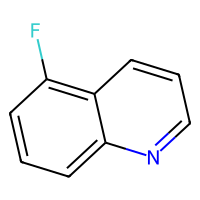
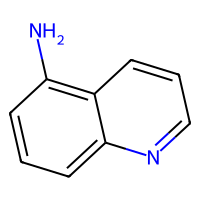
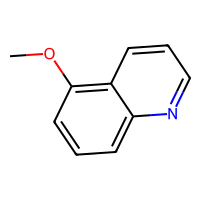
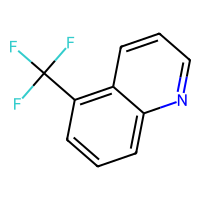
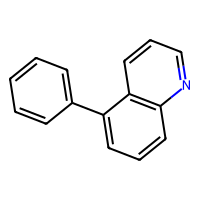
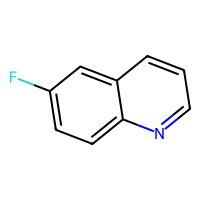
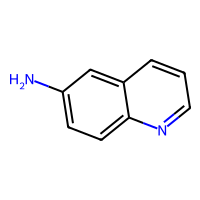
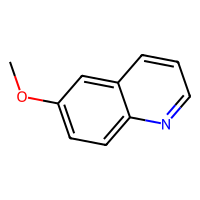
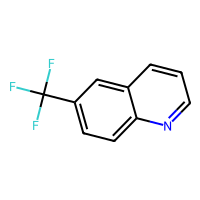
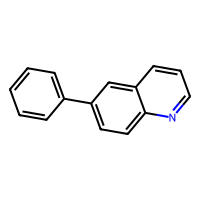
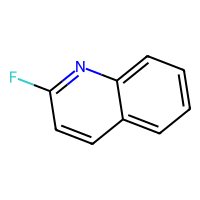
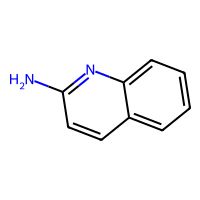
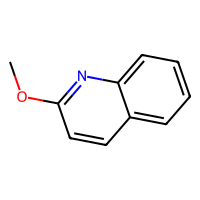
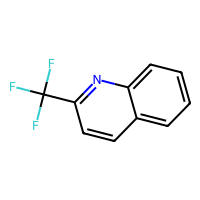
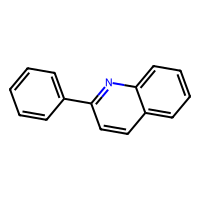
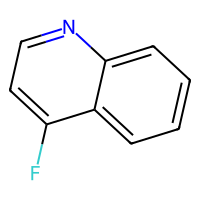
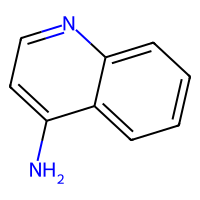
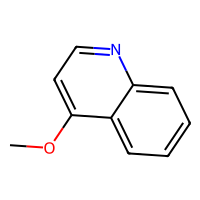
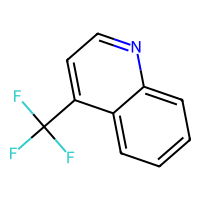
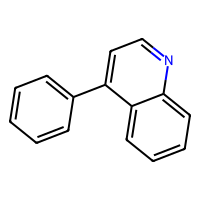

In [14]:
df_mols